    Trabalho final
**Disciplina**: Séries Temporais

**Professor**: Carlos Alberto Severiano 

**Aluno**: Marco Antonio do Nascimento

A atividade consiste em aplicar alguma técnica de previsão de séries temporais (aprendida ou não na disciplina) a algum problema. Por exemplo, aplicar um modelo ARIMA a séries temporais de dados financeiros. Vocês têm total liberdade para escolher o problema a ser abordado!
Para isso, vocês devem primeiramente escolher uma base de dados a ser utilizada como estudo. Para facilitar na busca de dados para o trabalho, existem muitos sites que fornecem bases de dados, normalmente usadas em Aprendizado de Máquina. Eles costumam ter a vantagem de oferecer uma base já armazenada em algum formato de arquivo que seja mais fácil de ser  processado a partir de linguagens de programação mais direcionadas para esse fim, como Python, R, dentre outras. 

**- A descrição do problema abordado**
O problema central do presente trabalho é a modelagem da volatilidade em séries temporais financeiras. A volatilidade é a medida de flutuações nos preços dos ativos ao longo do tempo, sendo fundamental para avaliar o risco financeiro. Dessa forma, buscou-se a implementação de duas abordagens diferentes para modelagem de volatilidade em séries temporais financeiras: o modelo GARCH e uma rede neural LSTM.
A análise visa comparar o desempenho do modelo GARCH(1,1), amplamente utilizado em finanças para modelar a volatilidade, com um modelo mais moderno e flexível, como a LSTM, que representa uma abordagem de aprendizado profundo para modelar padrões temporais complexos, explorando relações de longo prazo nos dados, o que pode ser valioso em comparação com métodos tradicionais como o GARCH.
Estimar a volatilidade de um ativo é estimar seu risco 

O código que será apresentado serve como uma demonstração prática de como implementar e comparar esses dois modelos, sendo útil para fins educacionais, especialmente em cursos relacionados a finanças quantitativas, ciência de dados aplicada a finanças ou aprendizado de máquina.

As métricas de avaliação, como MAE, MSE e RMSE, fornecem uma maneira quantitativa de avaliar o desempenho dos modelos, permitindo uma comparação objetiva de suas capacidades de previsão.

**- A descrição da base de dados usada (atributos, classes) ou o ambiente escolhido**

A base de dados escolhida é o retorno diário das ações da Petrobrás entre 2013 e 2023, extraída do Yahoo Finance.


**- Aplicação da técnica e a análise dos resultados (experimentos, divisão treinamento e teste, métricas de validação)**





[*********************100%***********************]  1 of 1 completed
Iteration:      1,   Func. Count:      6,   Neg. LLF: 1.2901601179338684e+19
Iteration:      2,   Func. Count:     17,   Neg. LLF: -5359.892015836287
Optimization terminated successfully    (Exit mode 0)
            Current function value: -5359.892011326467
            Iterations: 6
            Function evaluations: 17
            Gradient evaluations: 2


C:\Users\Marco Antonio\anaconda3\lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0009889. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


Epoch 1/50
78/78 [==============================] - 4s 10ms/step - loss: 0.0044
Epoch 2/50
78/78 [==============================] - 1s 9ms/step - loss: 0.0023
Epoch 3/50
78/78 [==============================] - 1s 9ms/step - loss: 0.0016
Epoch 4/50
78/78 [==============================] - 1s 9ms/step - loss: 0.0015
Epoch 5/50
78/78 [==============================] - 1s 9ms/step - loss: 0.0013
Epoch 6/50
78/78 [==============================] - 1s 9ms/step - loss: 0.0011
Epoch 7/50
78/78 [==============================] - 1s 10ms/step - loss: 0.0011
Epoch 8/50
78/78 [==============================] - 1s 13ms/step - loss: 9.6406e-04
Epoch 9/50
78/78 [==============================] - 1s 14ms/step - loss: 8.8609e-04
Epoch 10/50
78/78 [==============================] - 1s 14ms/step - loss: 8.4399e-04
Epoch 11/50
78/78 [==============================] - 1s 14ms/step - loss: 8.0785e-04
Epoch 12/50
78/78 [==============================] - 1s 14ms/step - loss: 7.6145e-04
Epoch 13/50
78/78 [===

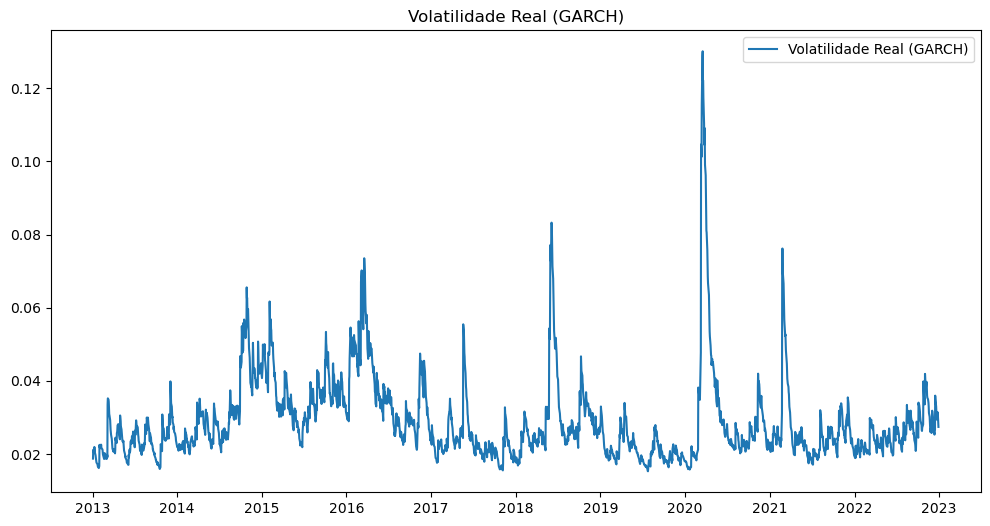

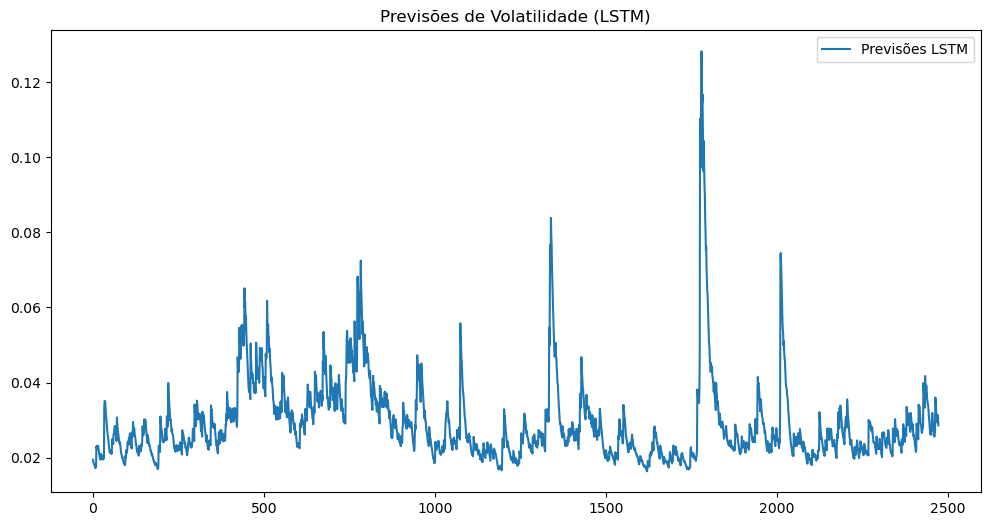

In [2]:
import yfinance as yf
import pandas as pd
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from arch import arch_model #BIBLIOTECA DO MODELO GARCH
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense #BIBLIOTECA DO MODELO LSTM
import matplotlib.pyplot as plt

# Baixe os dados históricos
symbol = 'PETR4.SA'
start_date = '2013-01-01'
end_date = '2023-01-01'
data = yf.download(symbol, start=start_date, end=end_date)

# Use apenas os preços de fechamento ajustados
prices = data['Adj Close']

# Calcule os retornos diários (variação percentual de um dia para o outro)
returns = prices.pct_change().dropna()

# Função para criar sequências temporais
def create_sequences(data, seq_length):
    x, y = [], []
    for i in range(len(data) - seq_length):
        x.append(data[i:(i + seq_length), 0])
        y.append(data[i + seq_length, 0])
    return np.array(x), np.array(y)


# Ajuste um modelo GARCH(1,1) - Optou-se pelo modelo GARCH de ordem 1,1 pois é o que apresenta os melhores 
#parametros dentre os modelos GARCH. Vale salientar que, em estatística, o modelo GARCH é o modelo mais generalista
#dentre os utilizados para a estimação da volatilidade.
#Saliento que os testes de raiz unitária, estacionariedade, ACF, PACF, AIC, BIC, dentre outros, foram desconsiderados. 
model_garch = arch_model(returns, vol='Garch', p=1, q=1)
results_garch = model_garch.fit()

# Obtenha a volatilidade condicional prevista pelo GARCH
conditional_volatility_garch = results_garch.conditional_volatility

# Calcule as métricas de avaliação para o modelo GARCH
mae_garch = mean_absolute_error(conditional_volatility_garch, returns)
mse_garch = mean_squared_error(conditional_volatility_garch, returns)
rmse_garch = np.sqrt(mse_garch)


# Normalização dos dados para o LSTM - a normalização dos dados antes de estimar um modelo LSTM
#visa melhorar a eficiência, estabilidade e desempenho do modelo durante o treinamento, contribuindo para 
#resultados mais robustos e confiáveis.
scaler = MinMaxScaler(feature_range=(0, 1))
volatility_normalized = scaler.fit_transform(conditional_volatility_garch.values.reshape(-1, 1))

# Crie sequências temporais - Ajustado para 10 períodos, mas pode ser ajustado 
seq_length = 10  # ajuste conforme necessário
x, y = create_sequences(volatility_normalized, seq_length)

# Reshape para o formato esperado pela LSTM 
# A LSTM espera um tensor tridimensional como entrada, onde as dimensões são (número de sequências, 
#comprimento da sequência, número de características).
#No caso, estamos adicionando uma dimensão para representar a única característica (1) em cada ponto da sequência.
x = np.reshape(x, (x.shape[0], x.shape[1], 1))

# Crie o modelo LSTM
model_lstm = Sequential() #Inicia um modelo sequencial, onde as camadas são adicionadas sequencialmente
model_lstm.add(LSTM(units=50, return_sequences=True, input_shape=(x.shape[1], 1))) #Adiciona uma camada LSTM com 50 unidades, retorna sequências (necessário para a próxima camada LSTM), e especifica a forma de entrada 
model_lstm.add(LSTM(units=50)) # Adiciona outra camada LSTM com 50 unidades, mas sem retornar sequências. Esta camada pode capturar padrões de longo prazo na sequência.
model_lstm.add(Dense(units=1)) #Adiciona uma camada densa com 1 unidade para produzir a saída final.
model_lstm.compile(optimizer='adam', loss='mean_squared_error') #Compila o modelo, especificando o otimizador 'adam' e a função de perda 'mean_squared_error'. Isso configura o modelo para treinamento.


# Treine o modelo LSTM - a ideia é treinar o modelo LSTM usando os dados fornecidos ao longo de 50 períodos 
#, atualizando o modelo a cada 32 amostras. Este é um processo essencial no treinamento de redes neurais, 
#onde o modelo ajusta seus parâmetros para minimizar a diferença entre suas previsões e as saídas reais.
model_lstm.fit(x, y, epochs=50, batch_size=32)

# Faça previsões com o modelo LSTM
predictions_lstm = model_lstm.predict(x)
predictions_lstm = scaler.inverse_transform(predictions_lstm)

# Calcule as métricas de avaliação para o modelo LSTM
mae_lstm = mean_absolute_error(conditional_volatility_garch[-len(predictions_lstm):], predictions_lstm)
mse_lstm = mean_squared_error(conditional_volatility_garch[-len(predictions_lstm):], predictions_lstm)
rmse_lstm = np.sqrt(mse_lstm)

# Imprima os resultados
print(f'Métricas para GARCH(1,1):')
print(f'MAE: {mae_garch:.4f}')
print(f'MSE: {mse_garch:.4f}')
print(f'RMSE: {rmse_garch:.4f}\n')

print(f'Métricas para LSTM:')
print(f'MAE: {mae_lstm:.4f}')
print(f'MSE: {mse_lstm:.4f}')
print(f'RMSE: {rmse_lstm:.4f}')
#As métricas MAE (Erro Médio Absoluto), MSE (Erro Quadrático Médio) e RMSE (Raiz do Erro Quadrático Médio)
#são indicadores de desempenho que ajudam a avaliar a qualidade das previsões feitas pelos modelos. Quanto menor, melhor.


# Plote o gráfico do GARCH
plt.figure(figsize=(12, 6))
plt.plot(conditional_volatility_garch, label='Volatilidade Real (GARCH)')
plt.title('Volatilidade Real (GARCH)')
plt.legend()
plt.show()

# Plote o gráfico do LSTM
plt.figure(figsize=(12, 6))
plt.plot(predictions_lstm, label='Previsões LSTM')
plt.title('Previsões de Volatilidade (LSTM)')
plt.legend()
plt.show()

**- A conclusão e indicação de trabalhos futuros**

**MAE (Erro Médio Absoluto):**

GARCH(1,1): 0.0333
LSTM: 0.0016
O MAE é a média absoluta dos erros entre as previsões e os valores reais. Quanto menor o MAE, melhor. Neste caso, o modelo LSTM tem um MAE significativamente menor do que o GARCH(1,1), indicando que as previsões do LSTM estão, em média, mais próximas dos valores reais do que as do GARCH.

**MSE (Erro Quadrático Médio):**

GARCH(1,1): 0.0019
LSTM: 0.0000
O MSE é a média dos quadrados dos erros entre as previsões e os valores reais. O MSE penaliza mais fortemente erros maiores. Neste caso, o MSE do LSTM é consideravelmente menor que o do GARCH, indicando que as previsões do LSTM têm erros quadráticos menores em relação aos valores reais.

**RMSE (Raiz do Erro Quadrático Médio):**

GARCH(1,1): 0.0439
LSTM: 0.0028
O RMSE é a raiz quadrada do MSE e tem a mesma unidade da variável alvo. Assim como o MSE, quanto menor o RMSE, melhor. O RMSE do LSTM é substancialmente menor, indicando que as previsões do LSTM têm um desempenho geral mais preciso em comparação com as do GARCH.

Todos resultados sugerem que o modelo LSTM superou o modelo GARCH(1,1) em termos de precisão das previsões, conforme avaliado por essas métricas. 

Como trabalho futuro, sugere-se efetuar os mesmos testes para as 20 ações mais negociadas no IBOVESPA, ou mesmo para ativos
como algumas criptomoedas e/ou commodities.
